# Tolman-Oppenheimer-Volkoff equations

This Jupyter/SageMath worksheet is relative to the lectures
[General relativity computations with SageManifolds](https://indico.cern.ch/event/505595/) given at the NewCompStar School 2016 (Coimbra, Portugal).
  
These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (curently version 1.2, as included in SageMath 8.2).

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.2/SM_TOV.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

This worksheet is divided in two parts:

1. Deriving the TOV system from the Einstein equation
2. Solving the TOV system to get stellar models


*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 8.2.rc2, Release Date: 2018-04-10'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

## 1. Deriving the TOV system from the Einstein equation

### Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


To get some information about the object `M`, we use the question mark:

In [4]:
M?

Using a double question mark, we get the Python source code (SageMath is **open source**, isn't it?):

In [5]:
M??

We declare the chart of spherical coordinates $(t,r,\theta,\phi)$, via the method `chart` acting on `M`; to see how to use it, we again use the question mark:

In [6]:
M.chart?

In [7]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

### Metric tensor

The static and spherically symmetric metric ansatz, with the unknown functions $\nu(r)$ and $m(r)$:

In [8]:
g = M.lorentzian_metric('g')
nu = function('nu')
m = function('m')
g[0,0] = -exp(2*nu(r))
g[1,1] = 1/(1-2*m(r)/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = -e^(2*nu(r)) dt*dt - 1/(2*m(r)/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

One can display the metric components as a list:

In [9]:
g.display_comp()

g_t,t = -e^(2*nu(r)) 
g_r,r = -1/(2*m(r)/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

By default, only the nonzero components are shown; to get all the components, set the option `only_nonzero` to `False`:

In [10]:
g.display_comp(only_nonzero=False)

g_t,t = -e^(2*nu(r)) 
g_t,r = 0 
g_t,th = 0 
g_t,ph = 0 
g_r,t = 0 
g_r,r = -1/(2*m(r)/r - 1) 
g_r,th = 0 
g_r,ph = 0 
g_th,t = 0 
g_th,r = 0 
g_th,th = r^2 
g_th,ph = 0 
g_ph,t = 0 
g_ph,r = 0 
g_ph,th = 0 
g_ph,ph = r^2*sin(th)^2

We can also display the metric components as a matrix, via the `[]` operator:

In [11]:
g[:]

[     -e^(2*nu(r))                 0                 0                 0]
[                0 -1/(2*m(r)/r - 1)                 0                 0]
[                0                 0               r^2                 0]
[                0                 0                 0     r^2*sin(th)^2]

The `[]` operator can also be used to access to individual elements:

In [12]:
g[0,0]

-e^(2*nu(r))

## Einstein equation

Let us start by evaluating the Ricci tensor of $g$:

In [13]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


In [14]:
Ric.display()

Ric(g) = ((r^2*e^(2*nu(r)) - 2*r*e^(2*nu(r))*m(r))*(d(nu)/dr)^2 - (r*e^(2*nu(r))*d(m)/dr - 2*r*e^(2*nu(r)) + 3*e^(2*nu(r))*m(r))*d(nu)/dr + (r^2*e^(2*nu(r)) - 2*r*e^(2*nu(r))*m(r))*d^2(nu)/dr^2)/r^2 dt*dt - ((r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 - 2*r*d(m)/dr - (r^2*d(m)/dr - r*m(r))*d(nu)/dr + (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 + 2*m(r))/(r^3 - 2*r^2*m(r)) dr*dr + (r*d(m)/dr - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))/r dth*dth + (r*d(m)/dr - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))*sin(th)^2/r dph*dph

The Ricci scalar is naturally obtained by the method `ricci_scalar()`:

In [15]:
g.ricci_scalar?

In [16]:
g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> -2*((r^2 - 2*r*m(r))*(d(nu)/dr)^2 - (r*d(m)/dr - 2*r + 3*m(r))*d(nu)/dr + (r^2 - 2*r*m(r))*d^2(nu)/dr^2 - 2*d(m)/dr)/r^2

As a check we can also compute it by taking the trace of the Ricci tensor with respect to $g$:

In [17]:
g.ricci_scalar() == g.inverse()['^{ab}']*Ric['_{ab}']

True

The Einstein tensor
$$ G_{ab} := R_{ab} - \frac{1}{2} R \, g_{ab},$$
or in index-free notation:
$$ G := \mathrm{Ric}(g) - \frac{1}{2} r(g) \, g $$

In [18]:
G = Ric - 1/2*g.ricci_scalar() * g
G.set_name('G')
print(G)

Field of symmetric bilinear forms G on the 4-dimensional differentiable manifold M


In [19]:
G.display()

G = 2*e^(2*nu(r))*d(m)/dr/r^2 dt*dt + 2*((r^2 - 2*r*m(r))*d(nu)/dr - m(r))/(r^3 - 2*r^2*m(r)) dr*dr + ((r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 - r*d(m)/dr - (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr + (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 + m(r))/r dth*dth + ((r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 - r*d(m)/dr - (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr + (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 + m(r))*sin(th)^2/r dph*dph

### The energy-momentum tensor

We consider a perfect fluid matter model. 
Let us first defined the fluid 4-velocity $u$: 

In [20]:
u = M.vector_field('u')
u[0] = exp(-nu(r))
u.display()

u = e^(-nu(r)) d/dt

In [21]:
u[:]

[e^(-nu(r)), 0, 0, 0]

In [22]:
print(u.parent())

Free module X(M) of vector fields on the 4-dimensional differentiable manifold M


Let us check that $u$ is a normalized timelike vector, i.e. that $g_{ab} u^a u^b = -1$, or, in index-free notation, $g(u,u)=-1$:

In [23]:
g(u,u)

Scalar field g(u,u) on the 4-dimensional differentiable manifold M

In [24]:
print(g(u,u))

Scalar field g(u,u) on the 4-dimensional differentiable manifold M


In [25]:
g(u,u).display()

g(u,u): M --> R
   (t, r, th, ph) |--> -1

In [26]:
g(u,u).parent()

Algebra of differentiable scalar fields on the 4-dimensional differentiable manifold M

In [27]:
print(g(u,u).parent())

Algebra of differentiable scalar fields on the 4-dimensional differentiable manifold M


In [28]:
g(u,u) == -1

True

To form the energy-momentum tensor, we need the 1-form $\underline{u}$ that is metric-dual to the vector $u$, i.e. 
$u_a = g_{ab} u^b$:

In [29]:
u_form = u.down(g)
print(u_form)

1-form on the 4-dimensional differentiable manifold M


In [30]:
u_form.display()

-e^nu(r) dt

The energy-momentum tensor is then
$$ T_{ab} = (\rho + p) u_a u_b + p \, g_{ab},$$
or in index-free notation:
$$ T = (\rho + p) \underline{u}\otimes\underline{u} + p \, g$$

Since the tensor product $\otimes$ is taken with the `*` operator, we write:

In [31]:
rho = function('rho')
p = function('p')
T = (rho(r)+p(r))* (u_form * u_form) + p(r) * g
T.set_name('T')
print(T)

Field of symmetric bilinear forms T on the 4-dimensional differentiable manifold M


In [32]:
T.display()

T = e^(2*nu(r))*rho(r) dt*dt + r*p(r)/(r - 2*m(r)) dr*dr + r^2*p(r) dth*dth + r^2*p(r)*sin(th)^2 dph*dph

In [33]:
T(u,u)

Scalar field T(u,u) on the 4-dimensional differentiable manifold M

In [34]:
print(T(u,u))

Scalar field T(u,u) on the 4-dimensional differentiable manifold M


In [35]:
T(u,u).display()

T(u,u): M --> R
   (t, r, th, ph) |--> rho(r)

### The Einstein equation

The Einstein equation is 
$$ G = 8\pi T$$
We rewrite it as $E = 0$ with $E := G - 8\pi T$:

In [36]:
E = G - 8*pi*T
E.set_name('E')
print(E)

Field of symmetric bilinear forms E on the 4-dimensional differentiable manifold M


In [37]:
E.display()

E = -2*(4*pi*r^2*e^(2*nu(r))*rho(r) - e^(2*nu(r))*d(m)/dr)/r^2 dt*dt - 2*(4*pi*r^3*p(r) - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))/(r^3 - 2*r^2*m(r)) dr*dr - (8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r dth*dth - (8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))*sin(th)^2/r dph*dph

In [38]:
E.display_comp()

E_t,t = -2*(4*pi*r^2*e^(2*nu(r))*rho(r) - e^(2*nu(r))*d(m)/dr)/r^2 
E_r,r = -2*(4*pi*r^3*p(r) - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))/(r^3 - 2*r^2*m(r)) 
E_th,th = -(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r 
E_ph,ph = -(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))*sin(th)^2/r

In [39]:
E[0,0]

-2*(4*pi*r^2*e^(2*nu(r))*rho(r) - e^(2*nu(r))*d(m)/dr)/r^2

In [40]:
EE0_sol = solve(E[0,0].expr()==0, diff(m(r),r))
EE0_sol

[diff(m(r), r) == 4*pi*r^2*rho(r)]

In [41]:
EE0 = EE0_sol[0]
EE0

diff(m(r), r) == 4*pi*r^2*rho(r)

In [42]:
E[1,1]

-2*(4*pi*r^3*p(r) - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))/(r^3 - 2*r^2*m(r))

In [43]:
EE1_sol = solve(E[1,1].expr()==0, diff(nu(r),r))
EE1 = EE1_sol[0]
EE1

diff(nu(r), r) == (4*pi*r^3*p(r) + m(r))/(r^2 - 2*r*m(r))

In [44]:
E[3,3] == E[2,2]*sin(th)^2

True

In [45]:
E[2,2]

-(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r

### The energy-momentum conservation equation
The energy-momentum tensor must obey
$$ \nabla_b T^b_{\ \, a} = 0$$
We first form the tensor $T^b_{\ \, a}$ by raising the first index of $T_{ab}$:

In [46]:
Tu = T.up(g, 0)
print(Tu)

Tensor field of type (1,1) on the 4-dimensional differentiable manifold M


We get the Levi-Civita connection $\nabla$ associated with the metric $g$:

In [47]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


In [48]:
nabla.display()

Gam^t_t,r = d(nu)/dr 
Gam^t_r,t = d(nu)/dr 
Gam^r_t,t = (r*e^(2*nu(r)) - 2*e^(2*nu(r))*m(r))*d(nu)/dr/r 
Gam^r_r,r = (r*d(m)/dr - m(r))/(r^2 - 2*r*m(r)) 
Gam^r_th,th = -r + 2*m(r) 
Gam^r_ph,ph = -(r - 2*m(r))*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

We apply `nabla` to `Tu` to get the tensor $(\nabla T)^b_{\ \, ac} = \nabla_c T^b_{\ \, a}$ (MTW index convention):

In [49]:
dTu = nabla(Tu)
print(dTu)

Tensor field of type (1,2) on the 4-dimensional differentiable manifold M


The divergence $\nabla_b T^b_{\ \, a}$ is then computed as the trace of the tensor $(\nabla T)^b_{\ \, ac}$ on the first index ($b$, position `0`) and last index ($c$, position `2`):

In [50]:
divT = dTu.trace(0,2)
print(divT)

1-form on the 4-dimensional differentiable manifold M


We can also take the trace by using the index notation:

In [51]:
divT == dTu['^b_{ab}']

True

In [52]:
print(divT)

1-form on the 4-dimensional differentiable manifold M


In [53]:
divT.display()

((p(r) + rho(r))*d(nu)/dr + d(p)/dr) dr

In [54]:
divT[:]

[0, (p(r) + rho(r))*d(nu)/dr + d(p)/dr, 0, 0]

The only non trivially vanishing components is thus

In [55]:
divT[1]

(p(r) + rho(r))*d(nu)/dr + d(p)/dr

Hence the energy-momentum conservation equation $\nabla_b T^b_{\ \, a}=0$ reduces to

In [56]:
EE2_sol = solve(divT[1].expr()==0, diff(p(r),r))
EE2 = EE2_sol[0]
EE2

diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

### The TOV system

Let us collect all the independent equations obtained so far:

In [57]:
for eq in [EE0, EE1, EE2]:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(nu(r), r) == (4*pi*r^3*p(r) + m(r))/(r^2 - 2*r*m(r))

diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

## 2. Solving the TOV system

In order to solve the TOV system, we need to specify a fluid equation of state. For simplicity, we select a polytropic one:
$$ p = k \rho^2$$

In [58]:
var('k', domain='real')
p_eos(r) = k*rho(r)^2
p_eos(r)

k*rho(r)^2

We substitute this expression for $p$ in the TOV equations:

In [59]:
EE1_rho = EE1.substitute_function(p, p_eos)
EE1_rho

diff(nu(r), r) == (4*pi*k*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r))

In [60]:
EE2_rho = EE2.substitute_function(p, p_eos)
EE2_rho

2*k*rho(r)*diff(rho(r), r) == -(k*rho(r)^2 + rho(r))*diff(nu(r), r)

In [61]:
EE2_rho = (EE2_rho / (2*k*rho(r))).simplify_full()
EE2_rho

diff(rho(r), r) == -1/2*(k*rho(r) + 1)*diff(nu(r), r)/k

We subsitute the expression of equation `EE1_rho` for $\partial \nu/\partial r$, in order to get rid of any derivative in the right-hand sides:

In [62]:
EE2_rho = EE2_rho.subs({diff(nu(r),r): EE1_rho.rhs()}).simplify_full()
EE2_rho

diff(rho(r), r) == -1/2*(4*pi*k^2*r^3*rho(r)^3 + 4*pi*k*r^3*rho(r)^2 + k*m(r)*rho(r) + m(r))/(k*r^2 - 2*k*r*m(r))

The system to solve for $(m(r), \nu(r), \rho(r))$ is thus

In [63]:
for eq in [EE0, EE1_rho, EE2_rho]:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(nu(r), r) == (4*pi*k*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r))

diff(rho(r), r) == -1/2*(4*pi*k^2*r^3*rho(r)^3 + 4*pi*k*r^3*rho(r)^2 + k*m(r)*rho(r) + m(r))/(k*r^2 - 2*k*r*m(r))

### Numerical resolution

Let us use a standard 4th-order Runge-Kutta method:

In [64]:
desolve_system_rk4?

We gather all equations in a list for the ease of manipulation:

In [65]:
eqs = [EE0, EE1_rho, EE2_rho]

To get a numerical solution, we have of course to specify some numerical value for the EOS constant $k$; let us choose $k=1/4$:

In [66]:
k0 = 1/4
rhs = [eq.rhs().subs(k=k0) for eq in eqs]
rhs

[4*pi*r^2*rho(r),
 (pi*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r)),
 -1/2*(pi*r^3*rho(r)^3 + 4*pi*r^3*rho(r)^2 + m(r)*rho(r) + 4*m(r))/(r^2 - 2*r*m(r))]

The integration for $m(r)$ and $\rho(r)$ has to stop as soon as $\rho(r)$ become negative. An easy way to ensure this is to use the Heaviside function (actually SageMath's `unit_step`; for some reason, `heaviside` does not work for the RK4 numerical resolution):

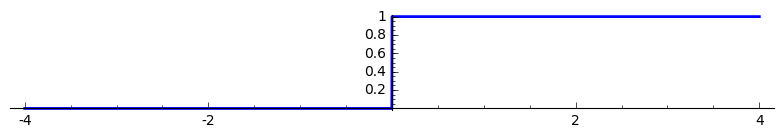

In [67]:
plot(unit_step(x), (x,-4,4), thickness=2, aspect_ratio=1)

and to multiply the r.h.s. of the $dm/dr$ and $d\rho/dr$ equations by $h(\rho)$:

In [68]:
rhs[0] = rhs[0] * unit_step(rho(r))
rhs[2] = rhs[2] * unit_step(rho(r))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 (pi*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r)),
 -1/2*(pi*r^3*rho(r)^3 + 4*pi*r^3*rho(r)^2 + m(r)*rho(r) + 4*m(r))*unit_step(rho(r))/(r^2 - 2*r*m(r))]

Let us add an extra equation, for the purpose of getting the star's radius as an output of the integration, via the equation $dR/dr = 1$, again multiplied by the Heaviside function of $\rho$:

In [69]:
rhs.append(1 * unit_step(rho(r)))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 (pi*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r)),
 -1/2*(pi*r^3*rho(r)^3 + 4*pi*r^3*rho(r)^2 + m(r)*rho(r) + 4*m(r))*unit_step(rho(r))/(r^2 - 2*r*m(r)),
 unit_step(rho(r))]

For the purpose of the numerical integration via `desolve_system_rk4`, we have to replace the symbolic functions $m(r)$, $\nu(r)$ and $\rho(r)$ by some symbolic variables, $m_1$, $\nu_1$ and
$\rho_1$, say:

In [70]:
var('m_1 nu_1 rho_1 r_1')
rhs = [y.subs({m(r): m_1, nu(r): nu_1, rho(r): rho_1}) for y in rhs]
rhs

[4*pi*r^2*rho_1*unit_step(rho_1),
 -(pi*r^3*rho_1^2 + m_1)/(2*m_1*r - r^2),
 1/2*(pi*r^3*rho_1^3 + 4*pi*r^3*rho_1^2 + m_1*rho_1 + 4*m_1)*unit_step(rho_1)/(2*m_1*r - r^2),
 unit_step(rho_1)]

The integration parameters:

In [71]:
rho_c = 1
r_min = 1e-8
r_max = 1
np = 200
delta_r = (r_max - r_min) / (np-1)

The numerical resolution, with the initial conditions 
$$(r_{\rm min}, m(r_{\rm min}), \nu(r_{\rm min}), \rho(r_{\rm min}), R(r_{\rm min})) = (r_{\rm min},0,0,\rho_{\rm c},r_{\rm min}) $$
set in the parameter `ics`:

In [72]:
sol = desolve_system_rk4(rhs, vars=(m_1, nu_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)

The solution is returned as a list, the first 10 elements of which being:

In [73]:
sol[:10]

[[1.00000000000000e-8, 0, 0, 1, 1.00000000000000e-8],
 [0.00502513557788945,
  5.31396735484216e-07,
  0.000105774675722407,
  0.9997355715039982,
  0.005025135577889449],
 [0.0100502611557789,
  4.24965314706328e-06,
  0.000384231107483355,
  0.9990395169277086,
  0.0100502611557789],
 [0.01507538673366835,
  1.43327909521466e-05,
  0.000846989113836226,
  0.9978829788643846,
  0.01507538673366835],
 [0.0201005123115578,
  3.39411395241295e-05,
  0.001494375305317491,
  0.9962654611649957,
  0.0201005123115578],
 [0.02512563788944725,
  6.62085388024929e-05,
  0.002326219908059372,
  0.99418783560987,
  0.02512563788944725],
 [0.0301507634673367,
  0.000114233579606946,
  0.003342215306107709,
  0.9916514444622955,
  0.0301507634673367],
 [0.03517588904522615,
  0.000181070903418294,
  0.00454196301924163,
  0.9886579816183987,
  0.03517588904522614],
 [0.0402010146231156,
  0.000269722576804864,
  0.005924983493499082,
  0.9852094664010502,
  0.04020101462311559],
 [0.04522614020100505,
  0.00038312955549096,
  0.007490718320263326,
  0.9813082359597236,
  0.04522614020100504]]

Each element is of the form $[r, m(r), \nu(r), \rho(r), R(r)]$. So to get the list of $(r, \rho(r))$ values, we write

In [74]:
rho_sol = [(s[0], s[3]) for s in sol]
rho_sol[:10]

[(1.00000000000000e-8, 1),
 (0.00502513557788945, 0.9997355715039982),
 (0.0100502611557789, 0.9990395169277086),
 (0.01507538673366835, 0.9978829788643846),
 (0.0201005123115578, 0.9962654611649957),
 (0.02512563788944725, 0.99418783560987),
 (0.0301507634673367, 0.9916514444622955),
 (0.03517588904522615, 0.9886579816183987),
 (0.0402010146231156, 0.9852094664010502),
 (0.04522614020100505, 0.9813082359597236)]

We may then use this list to have some plot of $\rho(r)$, thanks to the function `line`, which transforms a list into a graphical object:

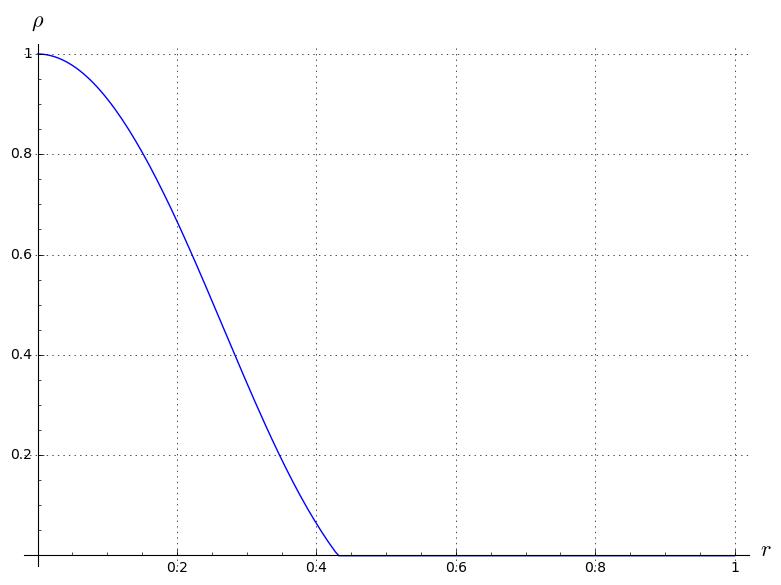

In [75]:
graph = line(rho_sol, axes_labels=[r'$r$', r'$\rho$'], gridlines=True)
graph

The solution for $m(r)$:

In [76]:
m_sol = [(s[0], s[1]) for s in sol]
m_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 5.31396735484216e-07),
 (0.0100502611557789, 4.24965314706328e-06),
 (0.01507538673366835, 1.43327909521466e-05),
 (0.0201005123115578, 3.39411395241295e-05),
 (0.02512563788944725, 6.62085388024929e-05),
 (0.0301507634673367, 0.000114233579606946),
 (0.03517588904522615, 0.000181070903418294),
 (0.0402010146231156, 0.000269722576804864),
 (0.04522614020100505, 0.00038312955549096)]

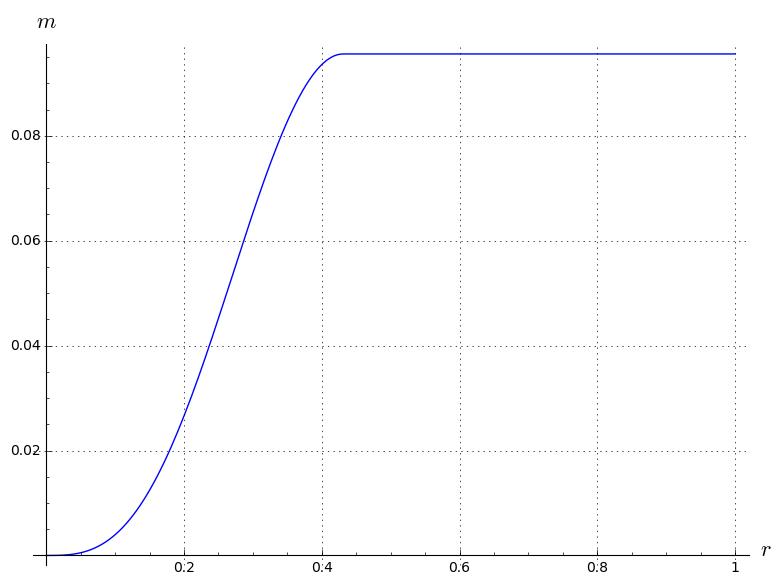

In [77]:
graph = line(m_sol, axes_labels=[r'$r$', r'$m$'], gridlines=True)
graph

The solution for $\nu(r)$ (has to be rescaled by adding a constant to ensure $\nu(+\infty) = 1$):

In [78]:
nu_sol = [(s[0], s[2]) for s in sol]
nu_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 0.000105774675722407),
 (0.0100502611557789, 0.000384231107483355),
 (0.01507538673366835, 0.000846989113836226),
 (0.0201005123115578, 0.001494375305317491),
 (0.02512563788944725, 0.002326219908059372),
 (0.0301507634673367, 0.003342215306107709),
 (0.03517588904522615, 0.00454196301924163),
 (0.0402010146231156, 0.005924983493499082),
 (0.04522614020100505, 0.007490718320263326)]

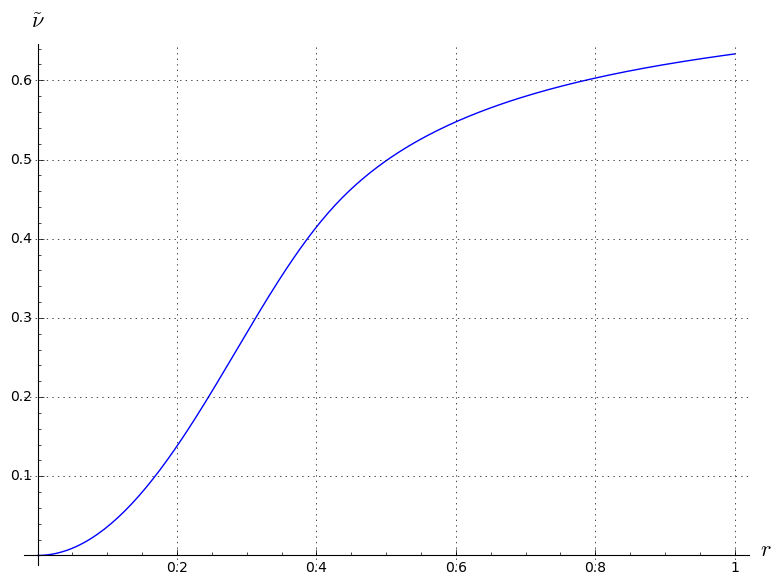

In [79]:
graph = line(nu_sol, axes_labels=[r'$r$', r'$\tilde{\nu}$'], gridlines=True)
graph

The solution for $R(r)$:

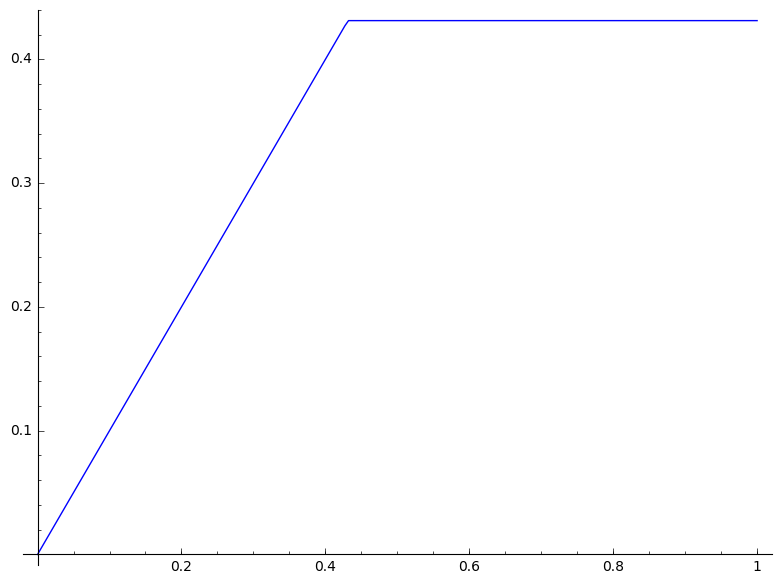

In [80]:
r_sol = [(s[0], s[4]) for s in sol]
line(r_sol)

The total gravitational mass of the star is obtained via the last element (index: `-1`) of the list of $(r,m(r))$ values:

In [81]:
M_grav = m_sol[-1][1]
M_grav

0.09559565598299921

Similarly, the stellar radius is obtained through the last element of the list of $(r,R(r))$ values:

In [82]:
R = r_sol[-1][1]
R

0.4313232887688435

The star's compactness:

In [83]:
M_grav/R

0.22163342085205887

### Sequence of stellar models

Let us perform a loop on the central density.
First we set up a list of values for $\rho_c$:

In [84]:
rho_c_min = 0.01
rho_c_max = 3
n_conf = 40
rho_c_list = [rho_c_min + i * (rho_c_max-rho_c_min)/(n_conf-1) for i in range(n_conf)]
rho_c_list

[0.0100000000000000,
 0.0866666666666667,
 0.163333333333333,
 0.240000000000000,
 0.316666666666667,
 0.393333333333333,
 0.470000000000000,
 0.546666666666667,
 0.623333333333333,
 0.700000000000000,
 0.776666666666667,
 0.853333333333333,
 0.930000000000000,
 1.00666666666667,
 1.08333333333333,
 1.16000000000000,
 1.23666666666667,
 1.31333333333333,
 1.39000000000000,
 1.46666666666667,
 1.54333333333333,
 1.62000000000000,
 1.69666666666667,
 1.77333333333333,
 1.85000000000000,
 1.92666666666667,
 2.00333333333333,
 2.08000000000000,
 2.15666666666667,
 2.23333333333333,
 2.31000000000000,
 2.38666666666667,
 2.46333333333333,
 2.54000000000000,
 2.61666666666667,
 2.69333333333333,
 2.77000000000000,
 2.84666666666667,
 2.92333333333333,
 3.00000000000000]

The loop:

In [85]:
M_list = list()
R_list = list()
for rho_c in rho_c_list:
    sol = desolve_system_rk4(rhs, vars=(m_1, nu_1, rho_1, r_1), ivar=r, 
                             ics=[r_min, 0, 0, rho_c, r_min], 
                             end_points=r_max, step=delta_r)
    M_list.append( sol[-1][1] )
    R_list.append( sol[-1][4] )

The mass along the sequence:

In [86]:
M_list

[0.003079315360454514,
 0.02348546985345206,
 0.03930692799158078,
 0.0516981286545538,
 0.06148304165147275,
 0.06927984377457193,
 0.07551555926927055,
 0.0805202557445157,
 0.08457113778228031,
 0.08783166910121751,
 0.09047779784378224,
 0.09260717100641455,
 0.09433415719194971,
 0.0957016482745759,
 0.09680530145501753,
 0.09766591038061952,
 0.09835121528373907,
 0.09885145273111141,
 0.09922756198663038,
 0.09948788735020943,
 0.09965397004970597,
 0.09974081642007522,
 0.09976091231232462,
 0.09972549478102291,
 0.09963724302696997,
 0.09952192314657442,
 0.09936764700836923,
 0.09916251861147671,
 0.09895164244004298,
 0.0987339306627872,
 0.09846948402179896,
 0.09821523250994979,
 0.09792970323068292,
 0.09765239505357755,
 0.09738036112959368,
 0.0970791116621731,
 0.09676265660918966,
 0.09647034426217437,
 0.096161790313415,
 0.095870481103591]

The radius along the sequence:

In [87]:
R_list

[0.6247906235175875,
 0.5996649956281401,
 0.575376888668341,
 0.5552763863567831,
 0.5368509259045217,
 0.5201005073115568,
 0.5050251305778883,
 0.4916247957035165,
 0.4798995026884412,
 0.4698492515326624,
 0.4589614794472353,
 0.4497487492211047,
 0.4396984980653258,
 0.4313232887688435,
 0.4246231213316576,
 0.4162479120351752,
 0.4095477445979893,
 0.4045226190200999,
 0.3986599725125622,
 0.3911222841457281,
 0.3860971585678387,
 0.3810720329899492,
 0.3760469074120598,
 0.3735343446231151,
 0.3693467399748739,
 0.3643216143969845,
 0.3592964888190951,
 0.3559464051005021,
 0.3542713632412057,
 0.3492462376633163,
 0.3458961539447233,
 0.3442211120854268,
 0.3408710283668339,
 0.3391959865075374,
 0.3366834237185927,
 0.3333333399999998,
 0.330820777211055,
 0.3291457353517586,
 0.3257956516331656,
 0.3241206097738691]

To draw $M$ as a function of $\rho_{\rm c}$, we use the Python function `zip` to construct a list of $(\rho_{\rm c}, M)$ values:

In [88]:
zip(rho_c_list, M_list)

[(0.0100000000000000, 0.003079315360454514),
 (0.0866666666666667, 0.02348546985345206),
 (0.163333333333333, 0.03930692799158078),
 (0.240000000000000, 0.0516981286545538),
 (0.316666666666667, 0.06148304165147275),
 (0.393333333333333, 0.06927984377457193),
 (0.470000000000000, 0.07551555926927055),
 (0.546666666666667, 0.0805202557445157),
 (0.623333333333333, 0.08457113778228031),
 (0.700000000000000, 0.08783166910121751),
 (0.776666666666667, 0.09047779784378224),
 (0.853333333333333, 0.09260717100641455),
 (0.930000000000000, 0.09433415719194971),
 (1.00666666666667, 0.0957016482745759),
 (1.08333333333333, 0.09680530145501753),
 (1.16000000000000, 0.09766591038061952),
 (1.23666666666667, 0.09835121528373907),
 (1.31333333333333, 0.09885145273111141),
 (1.39000000000000, 0.09922756198663038),
 (1.46666666666667, 0.09948788735020943),
 (1.54333333333333, 0.09965397004970597),
 (1.62000000000000, 0.09974081642007522),
 (1.69666666666667, 0.09976091231232462),
 (1.77333333333333, 0.09972549478102291),
 (1.85000000000000, 0.09963724302696997),
 (1.92666666666667, 0.09952192314657442),
 (2.00333333333333, 0.09936764700836923),
 (2.08000000000000, 0.09916251861147671),
 (2.15666666666667, 0.09895164244004298),
 (2.23333333333333, 0.0987339306627872),
 (2.31000000000000, 0.09846948402179896),
 (2.38666666666667, 0.09821523250994979),
 (2.46333333333333, 0.09792970323068292),
 (2.54000000000000, 0.09765239505357755),
 (2.61666666666667, 0.09738036112959368),
 (2.69333333333333, 0.0970791116621731),
 (2.77000000000000, 0.09676265660918966),
 (2.84666666666667, 0.09647034426217437),
 (2.92333333333333, 0.096161790313415),
 (3.00000000000000, 0.095870481103591)]

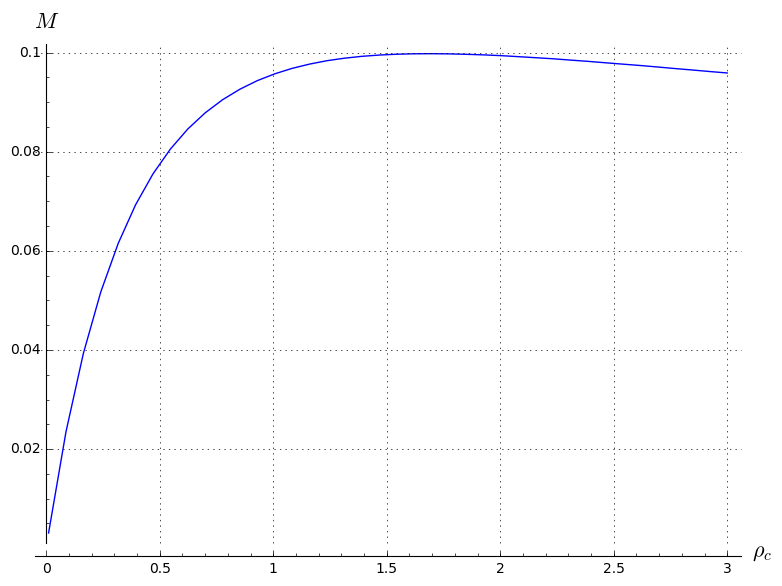

In [89]:
graph = line(zip(rho_c_list, M_list), axes_labels=[r'$\rho_c$', r'$M$'], gridlines=True)
graph

Similarly, we draw $M$ as a function of $R$:

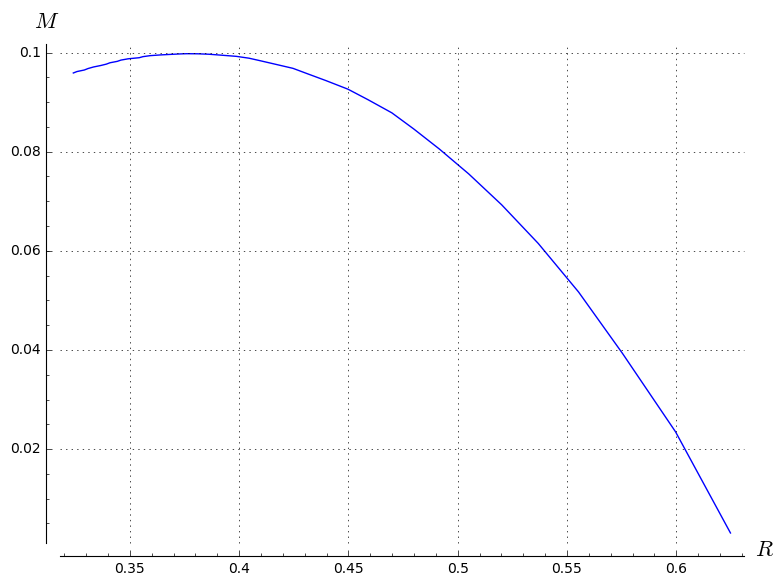

In [90]:
graph = line(zip(R_list, M_list), axes_labels=[r'$R$', r'$M$'], gridlines=True)
graph

and we save the plot in a pdf file to use it in our next publication ;-)

In [91]:
graph.save('plot_M_R.pdf')